In [3]:
import ROOT
import numpy as np, pandas as pd
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
plt.set_cmap("viridis")

#presets for plot style
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('axes', labelsize=18)
rc('legend', fontsize=18)

import matplotlib.patches as patches

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

<Figure size 700x700 with 0 Axes>

In [4]:
import matplotlib
import matplotlib.cm as cm
cmap = matplotlib.cm.get_cmap('magma')
from matplotlib.patches import Rectangle

dX=8.7; dx=2; dZ=8.08; dz=.604
def drawEvent(event,title=None, MIP=1):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6.85), gridspec_kw=dict(width_ratios=[0.8,1]))
    gx=event.group_x
    gz=event.group_z
    px=event.panel_x
    py=event.panel_y
    pz=event.panel_z
    adc=event.ADC_ADC
    adc_order=event.ADC_order
    
    
    for ax in ax1, ax2:
        ax.set_xlim(-70, 70)
        ax.set_ylim(-70, 70)
        ax.set_xlabel("x [m]")
    
    ax1.set_ylabel("z [m]")
   
    for i in range(0, 14):
        for j in range(0, 14):
            if i in (0,13) and j in (3,4, 6,7,9,10) \
                or j in (0,13) and i in (3,4, 6,7,9,10)\
                or i in (1,12) or j in (1, 12):
                continue
            r=Rectangle(((i-7)*dX, (j-7)*dZ), dX,dZ, facecolor='w', edgecolor='0.8')
            ax1.add_patch(r)
            r=Rectangle(((i-7)*dX, (j-7)*dZ), dX,dZ, facecolor='w', edgecolor='0.8')
            ax2.add_patch(r)
            #print(i,j)
    
    norm=matplotlib.colors.LogNorm(vmin=1, vmax=np.max(adc))
    for i in range(0,len(gx)):
        if adc_order[i]==0:
            r=Rectangle(((gx[i]-1)*dX+(px[i]-1)*dx-7*dX, (gz[i]-1)*dZ+(pz[i]-1)*dz-7*dZ), dx,dz, facecolor=cmap(norm(adc[i])), edgecolor='none')
            if py[i]==2:
                ax1.add_patch(r)
            if py[i]==1:
                ax2.add_patch(r)
    cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax2)
    
    fig.suptitle(title)
    ax1.text(-60, -60,"ABOVE GROUND", color='0.5')
    ax2.text(-60, -60,"UNDERGROUND", color='0.5')
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    cbar.set_label("energy [MIPs]")
    


In [5]:
import sys
help(sys)

Help on built-in module sys:

NAME
    sys

MODULE REFERENCE
    https://docs.python.org/3.10/library/sys.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to some objects used or maintained by the
    interpreter and to functions that interact strongly with the interpreter.
    
    Dynamic objects:
    
    argv -- command line arguments; argv[0] is the script pathname if known
    path -- module search path; path[0] is the script directory, else ''
    modules -- dictionary of loaded modules
    
    displayhook -- called to show results in an interactive session
    excepthook -- called to handle any uncaught exception other than SystemExit
      To customize pri

3179
[102.33342483  78.01033563 419.05109459] [[ 7.17885794 -4.84357568 -2.54402287]
 [-4.84357568  7.45473694  3.89666928]
 [-2.54402287  3.89666928 13.81658733]]


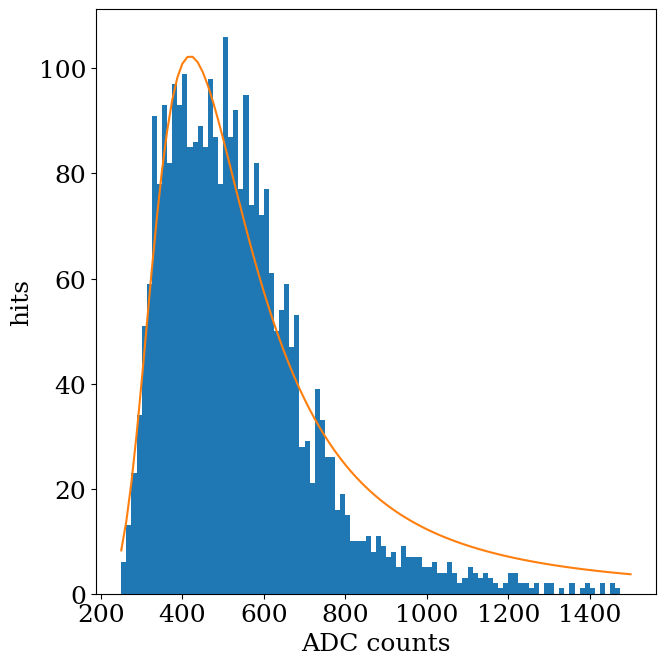

In [70]:
f= ROOT.TFile("muon_test.root")
tree=f.Get("condor")
all_adcs=[]
for event in tree:
    #all_adcs+=list(np.sqrt(np.multiply(list(event.ADC_ADC[::2]),list(event.ADC_ADC[1::2]))))
    all_adcs+=list(event.ADC_ADC[::2])
print(len(all_adcs))
y,x,_=plt.hist(all_adcs, bins=100, range=(250, 1500))
#requires Python 3.10
#pip install pylandau
import pylandau
from scipy.optimize import curve_fit

f=lambda x,a,b,c: a*pylandau.landau((x-c)/b)
#popt, pcov=curve_fit(f, (x[:-1]+x[1:])/2, y, sigma=np.sqrt(y), p0=(300,200, 450))
popt, pcov=curve_fit(f, (x[:-1]+x[1:])/2, y, p0=(240.62641819, 25.02595544, 450.02910595))
plt.plot(x, f(x, *popt), linestyle='-')
print(popt, pcov)
plt.xlabel("ADC counts")

plt.ylabel("hits")
plt.show()
MIPS_from_muons = popt[2]
#help(curve_fit)


In [71]:
# f= ROOT.TFile("muon_test.root")
# tree=f.Get("condor")
# all_adcs=[]
# for event in tree:
#     all_adcs+=list(np.sqrt(np.multiply(list(event.ADC_ADC[::2]),list(event.ADC_ADC[1::2]))))
#     #all_adcs+=list(event.ADC_ADC[::2])
# print(len(all_adcs))
# y,x,_=plt.hist(all_adcs, bins=100, range=(350, 1500))
# #requires Python 3.10
# #pip install pylandau
# import pylandau
# from scipy.optimize import curve_fit

# f=lambda x,a,b,c: a*pylandau.landau((x-c)/b)
# popt, pcov=curve_fit(f, (x[:-1]+x[1:])/2, y, p0=(240.62641819, 25.02595544, 450.02910595))
# plt.plot(x, f(x, *popt), linestyle='-')
# print(popt, pcov)
# plt.xlabel("$\\sqrt{ADCL*ADCR}$ counts")

# plt.ylabel("hits")
# plt.show()

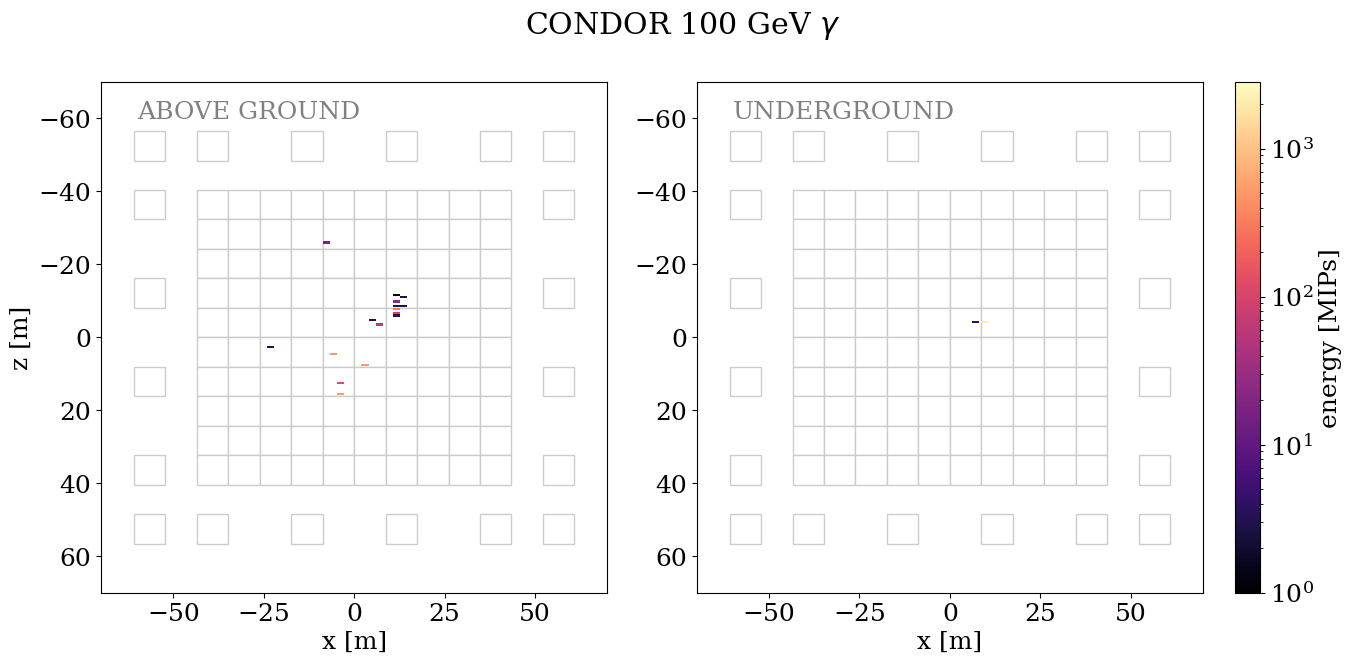

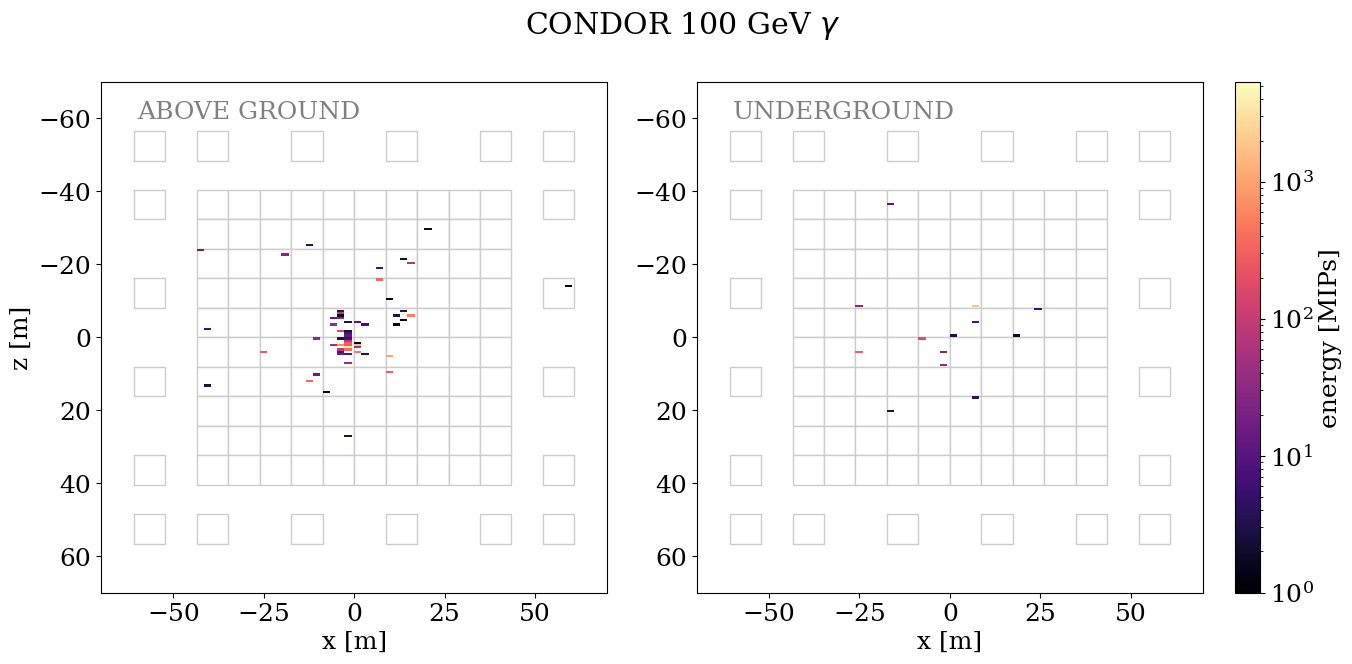

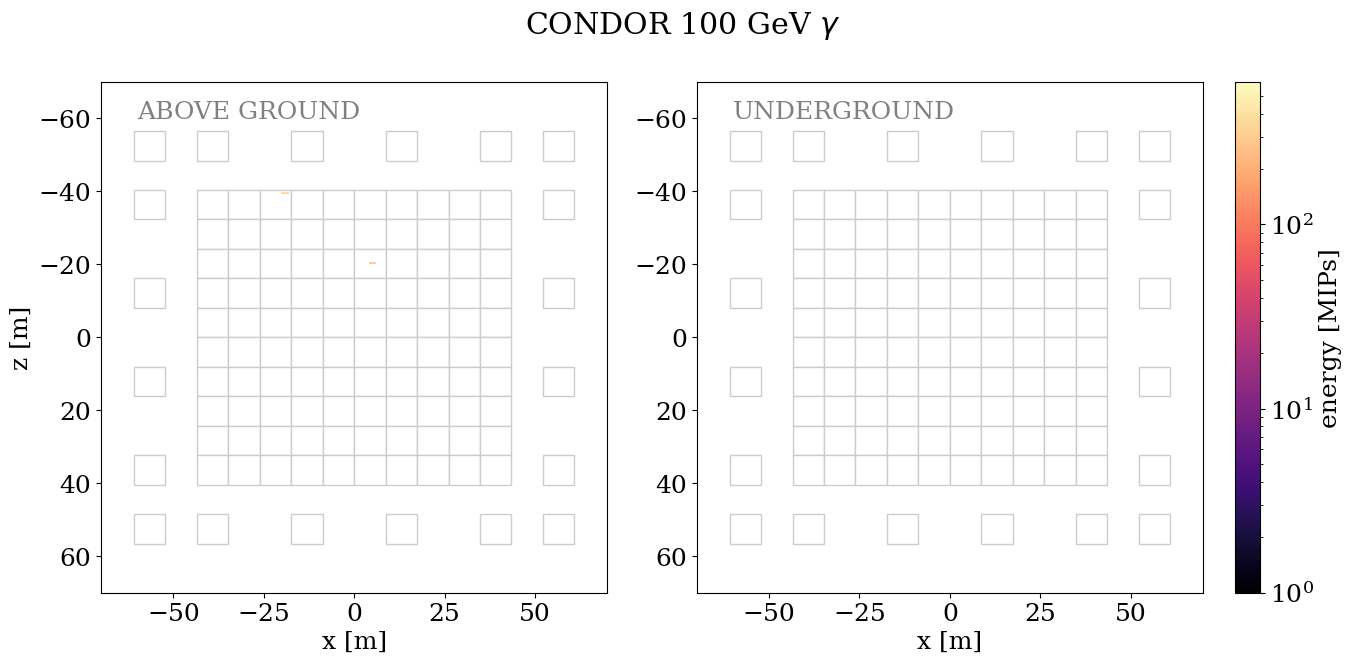

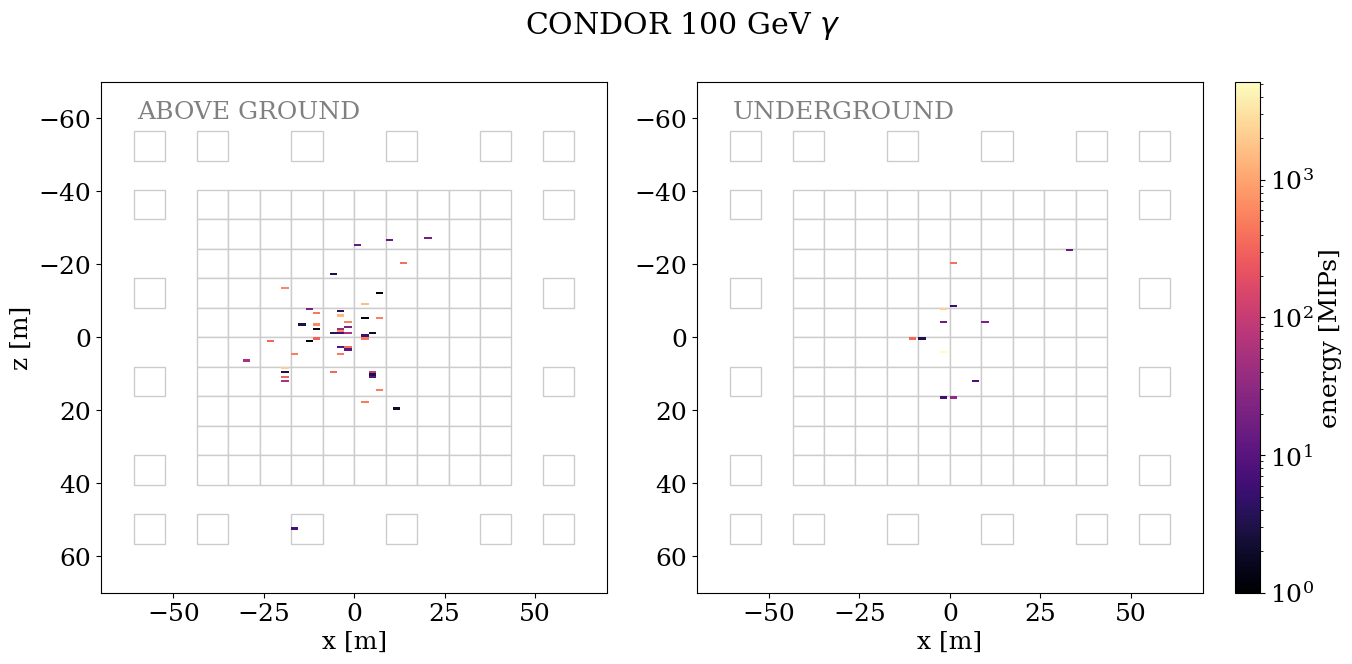

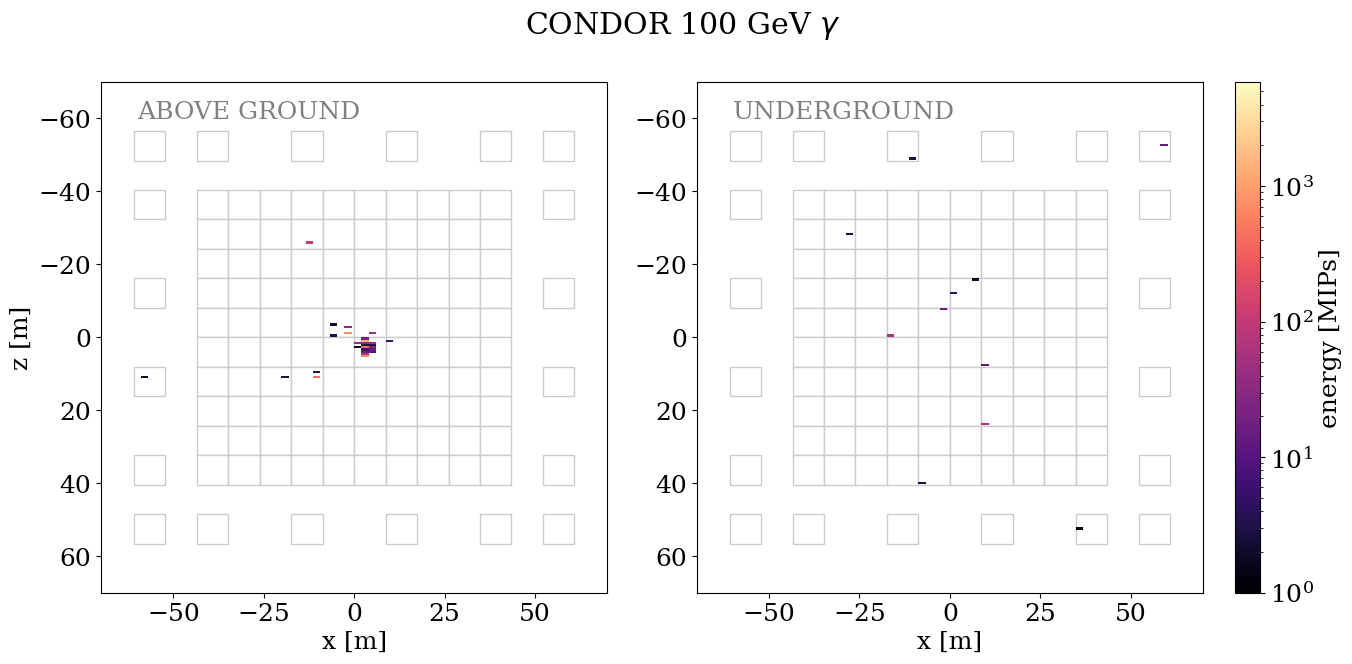

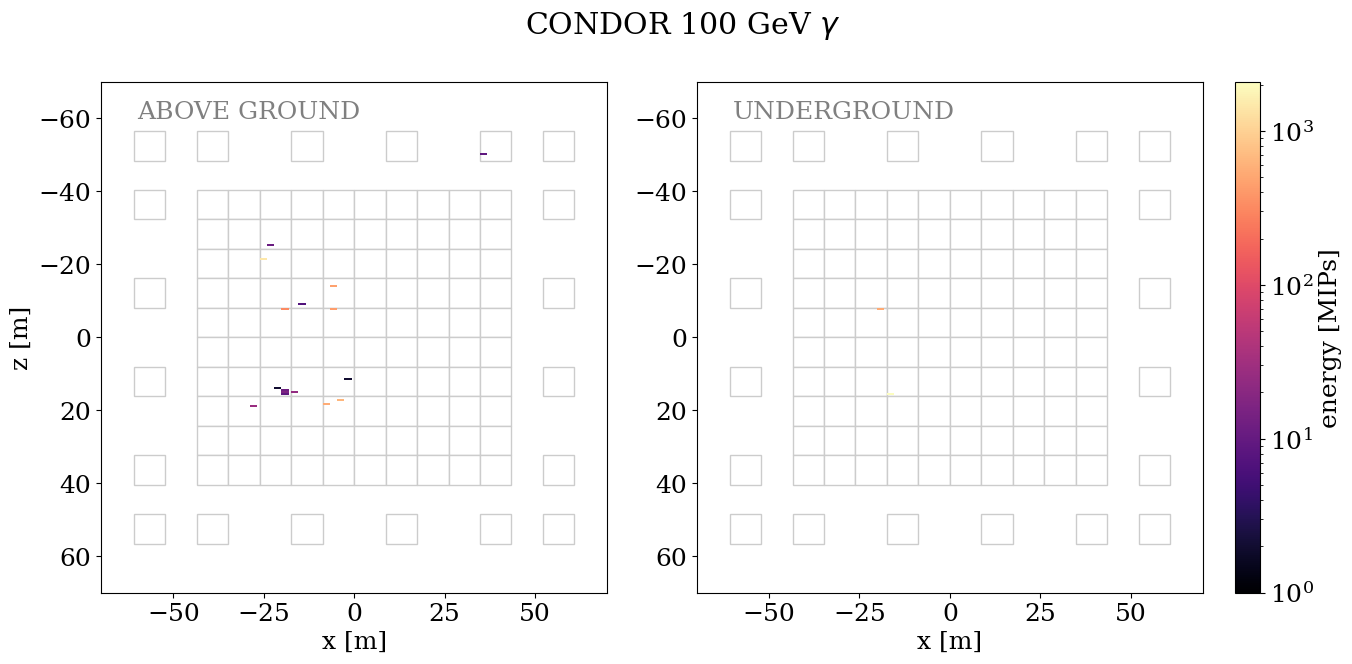

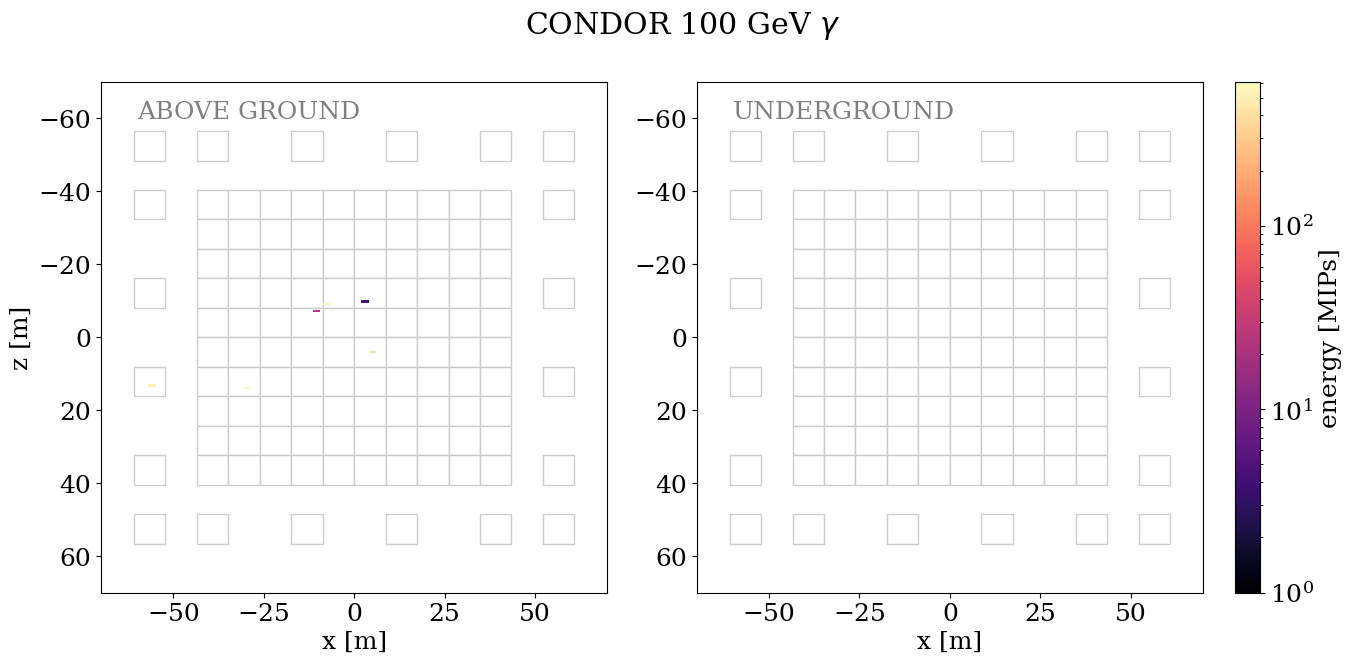

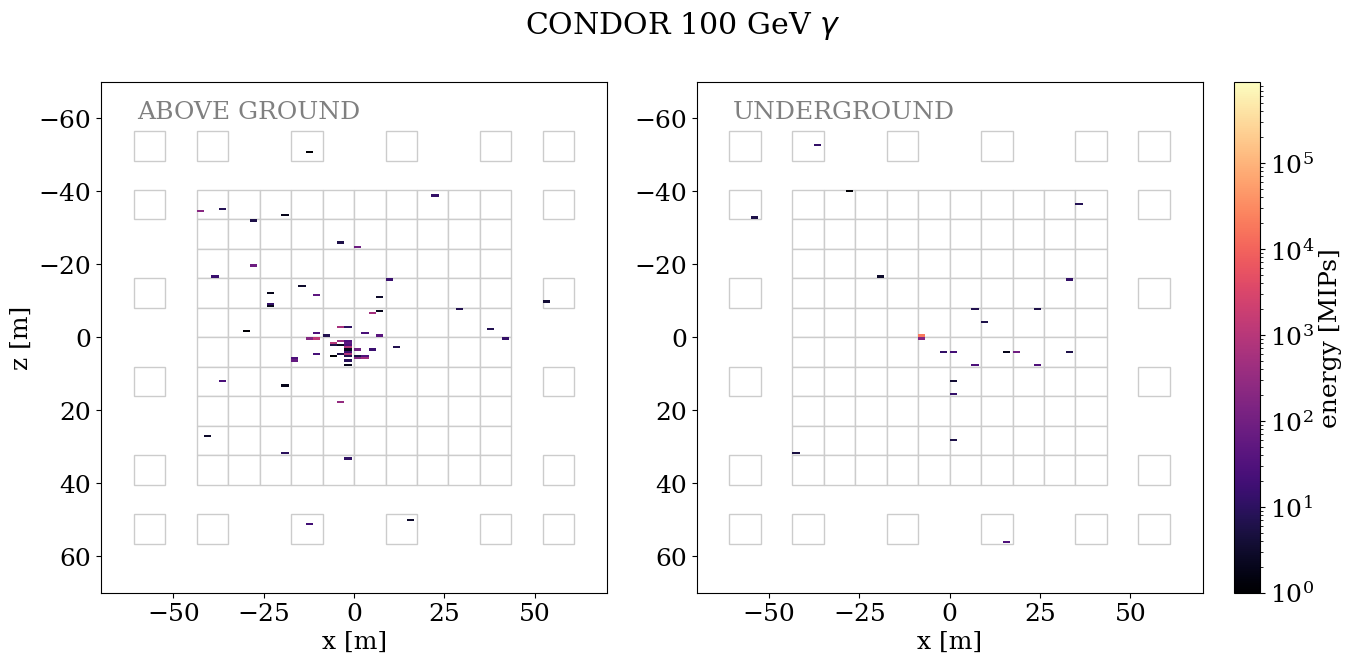

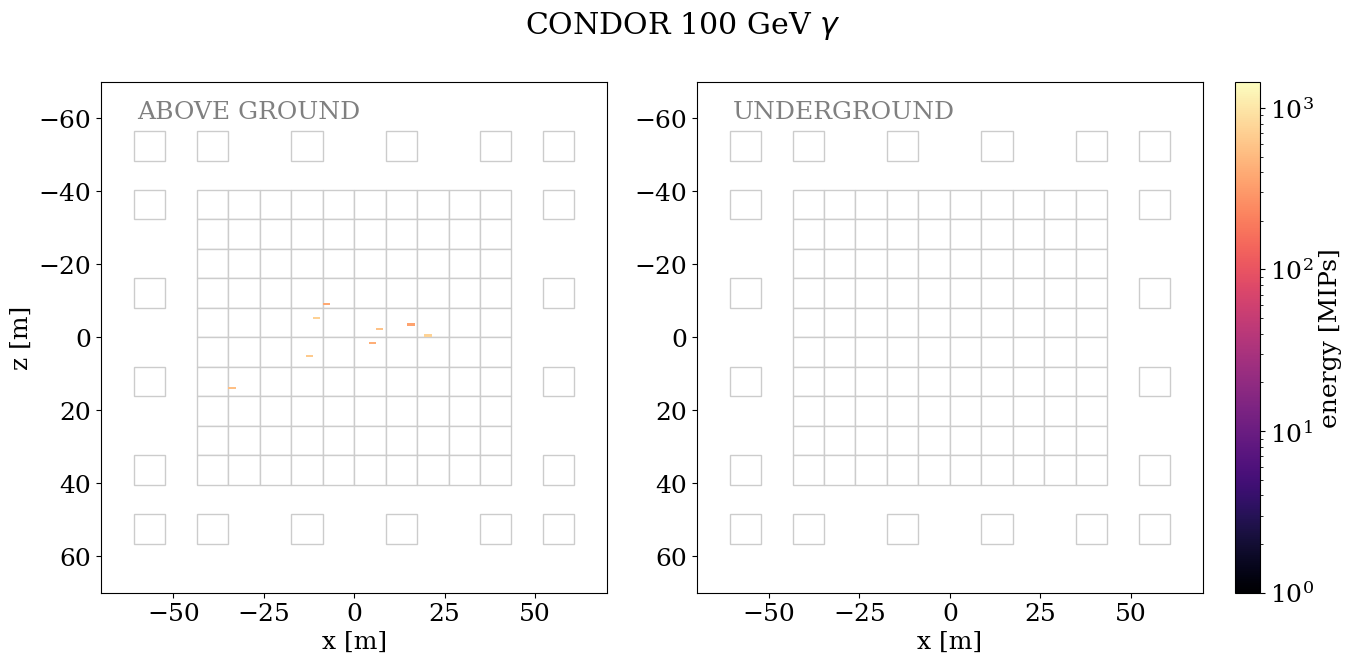

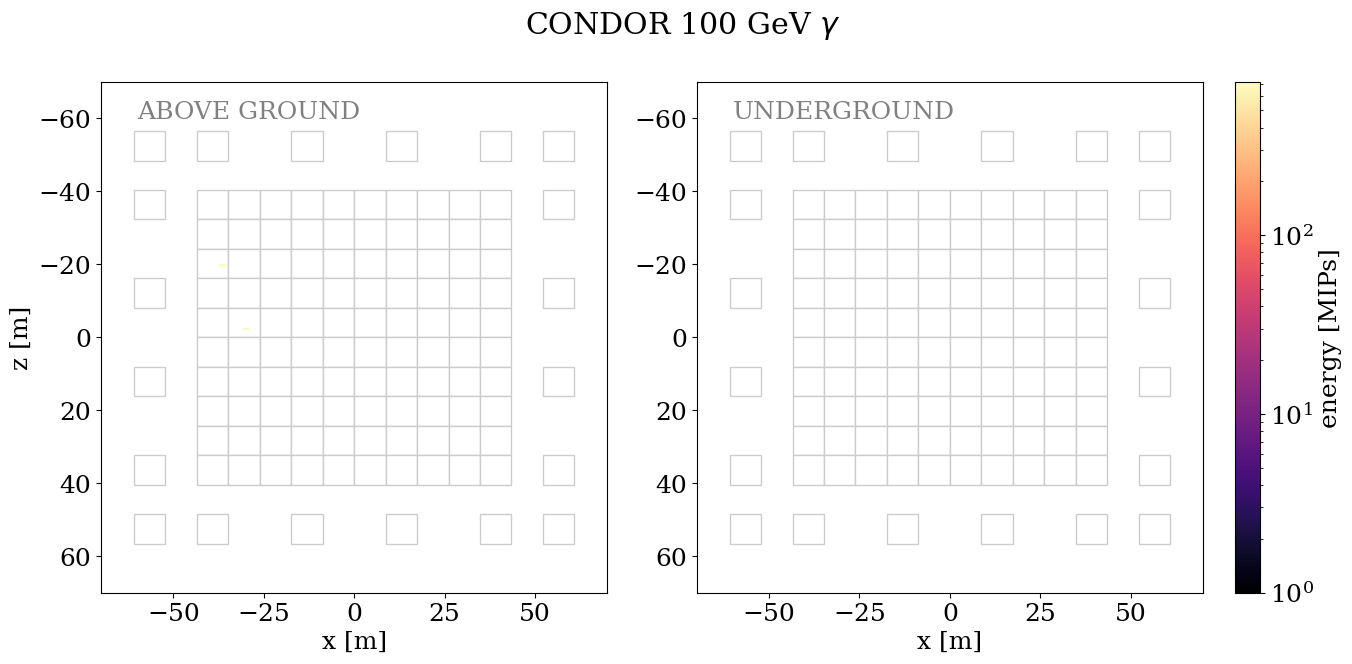

In [72]:
f= ROOT.TFile("out.root")
tree=f.Get("condor")
for event in tree:
    #plt.scatter((np.multiply(event.group_x,13)+event.panel_x)/13, (np.multiply(event.group_y,4)+event.panel_z)/4,c=event.ADC_ADC)
    drawEvent(event, "CONDOR 100 GeV $\\gamma$", MIP=MIPS_from_muons)
    plt.show()